In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Polynomial regression

Index(['number_of_executors', 'executor_memory', 'dag_duration'], dtype='object')


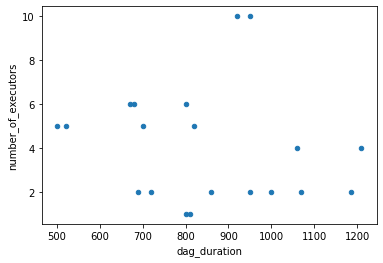

In [16]:
train_df = pd.read_csv('prom_data.csv')
train_df.drop(['executor_core_request'], axis=1, inplace=True)
train_df.drop(['driver_memory'], axis=1, inplace=True)
train_df.plot(kind = 'scatter', x='dag_duration', y='number_of_executors')
print(train_df.columns)

In [17]:
train_df.head()

,number_of_executors,executor_memory,dag_duration
0,2,512,1186
1,4,512,1210
2,2,550,1070
3,4,550,1060
4,2,600,1000


In [18]:
X = train_df.iloc[:, 0:2]
Y = train_df.iloc[:, 2]
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_
coef = lin_reg.coef_
intercept = lin_reg.intercept_

## scipy optimize
### https://www.youtube.com/watch?v=cXHvC_FGx24

In [20]:
from scipy.optimize import minimize

# quadratic fun computed above
def objective(x):
    x1 = x[0]
    x2 = x[1]
    return x1*coef[0] + x2*coef[1] + x1**2*coef[2] + x1*x2*coef[3] + x2**2*coef[4] + intercept

# no. of executors > 1
def constraint1(x):
    return x[0] - 1

# min. executor memory > 512
def constraint2(x):
    return x[1] - 512

# initial guess
x0 = [2, 512]

# optimization bounds
b = (60, 1500)
bnds = (b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = [con1, con2]
sol = minimize(objective,x0, method='SLSQP',bounds=bnds, constraints=cons)
print(sol)

     fun: 22836.83822139487
     jac: array([820.97216797,   2.26855469])
 message: 'Optimization terminated successfully'
    nfev: 3
     nit: 5
    njev: 1
  status: 0
 success: True
       x: array([ 60., 512.])


## Polyfit from numpy for each attribute - test

[769.01111392 767.15545808 765.36492658 763.6351029  761.96200509
 760.34203055 758.77190939 757.24866458 755.76957806 754.33216155
 752.93413131 751.57338636 750.24798946 748.95615054 747.69621216
 746.46663672 745.26599516 744.09295702 742.94628154 741.82480976
 740.72745754 739.65320919 738.60111188 737.57027052 736.55984321
 735.56903709 734.59710462 733.64334019 732.707077   731.78768435
 730.88456499 729.99715285 729.1249109  728.26732917 727.423923
 726.59423135 725.77781535 724.97425682 724.18315707 723.40413566
 722.63682929 721.88089085 721.13598839 720.40180433 719.67803458
 718.96438782 718.26058478 717.56635758 716.88144915 716.20561263
 715.53861082 714.88021573 714.23020806 713.58837681 712.95451882
 712.32843843 711.70994708 711.09886299 710.49501083 709.89822143
 709.30833149 708.72518329 708.14862448 707.5785078  707.01469089
 706.45703603 705.90540999 705.3596838  704.81973261 704.28543546
 703.75667516 703.23333815 702.71531429 702.20249679 701.69478204
 701.1920694

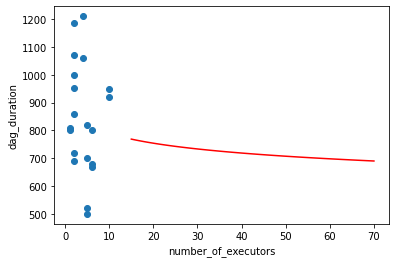

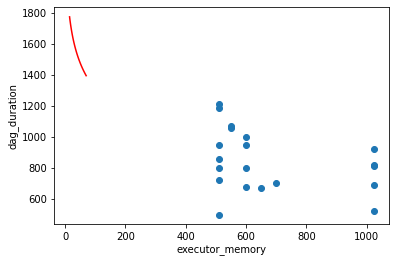

In [22]:
number_of_executors = train_df.iloc[:, 0]
executor_memory	 = train_df.iloc[:, 1]
dag_duration = train_df.iloc[:, 2]

#fit the model
fit_exec_num = np.polyfit(np.log(number_of_executors), dag_duration, 1)

fit_exec_mem = np.polyfit(np.log(executor_memory), dag_duration, 1)

x = np.linspace(15,70,100)
y_exec_num = fit_exec_num[0] * np.log(x) + fit_exec_num[1]
y_exec_mem = fit_exec_mem[0] * np.log(x) + fit_exec_mem[1]

#view the output of the model
print(fit_exec_num)
print(fit_exec_mem)

plt.scatter(number_of_executors, dag_duration)
plt.xlabel("number_of_executors")
plt.ylabel("dag_duration")
plt.plot(x, y_exec_num, 'r')
plt.show()

plt.scatter(executor_memory, dag_duration)
plt.xlabel("executor_memory")
plt.ylabel("dag_duration")
plt.plot(x, y_exec_mem, 'r')
plt.show()